In [2]:
!nvidia-smi

Tue May 25 17:28:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **1. Ask**
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

#**2. Prepare**




In [3]:
from google.colab import files
upload = files.upload()

Saving loan.csv to loan.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("loan.csv")

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **3. Process**

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [11]:
df['Gender'].mode()

0    Male
dtype: object

In [12]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#**4. Analyze**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

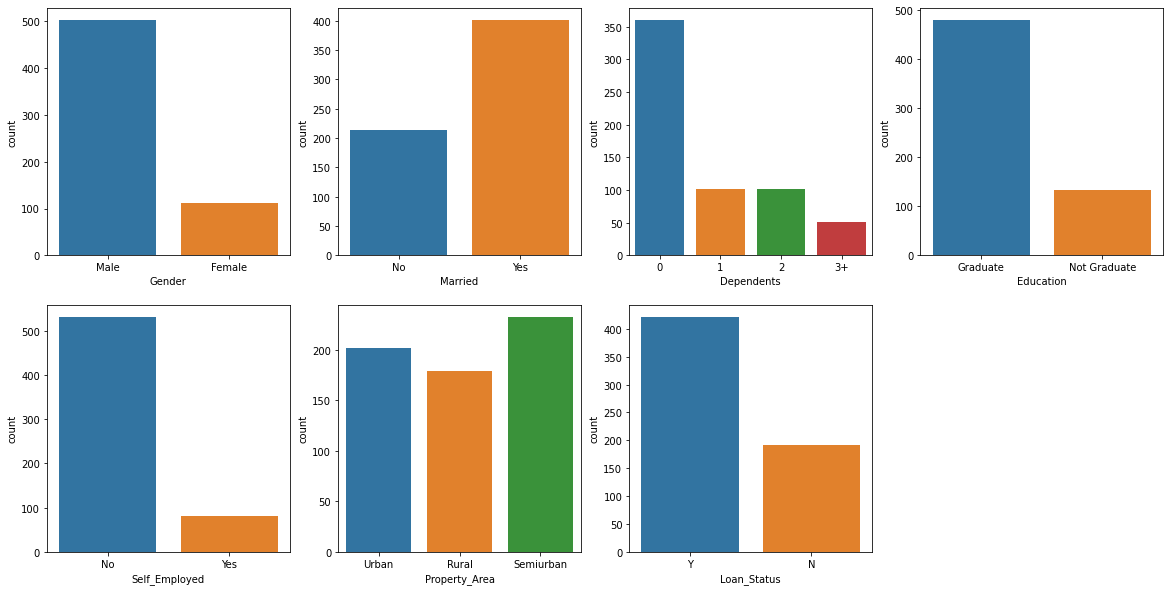

In [15]:
cat = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
j=1
plt.figure(figsize=(20,10))
for i in cat: 
  plt.subplot(2,4,j)
  sns.countplot(df[i])
  j=j+1

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
sts = StandardScaler()
df[features] = sts.fit_transform(df[features])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

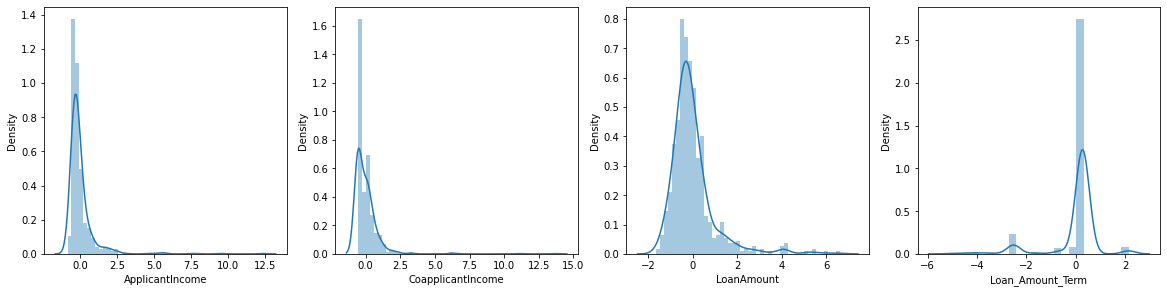

In [20]:
num = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
j=1
plt.figure(figsize=(20,10))
for i in num: 
  plt.subplot(2,4,j)
  sns.distplot(df[i])
  j=j+1

In [21]:
df['Total Amount'] = df['ApplicantIncome']+df['CoapplicantIncome']

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Amount
0,LP001002,Male,No,0,Graduate,No,0.072991,-0.554487,0.000000,0.279851,1.0,Urban,Y,-0.481497
1,LP001003,Male,Yes,1,Graduate,No,-0.134412,-0.038732,-0.219273,0.279851,1.0,Rural,N,-0.173144
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393747,-0.554487,-0.957641,0.279851,1.0,Urban,Y,-0.948235
3,LP001006,Male,Yes,0,Not Graduate,No,-0.462062,0.251980,-0.314547,0.279851,1.0,Urban,Y,-0.210083
4,LP001008,Male,No,0,Graduate,No,0.097728,-0.554487,-0.064454,0.279851,1.0,Urban,Y,-0.456759


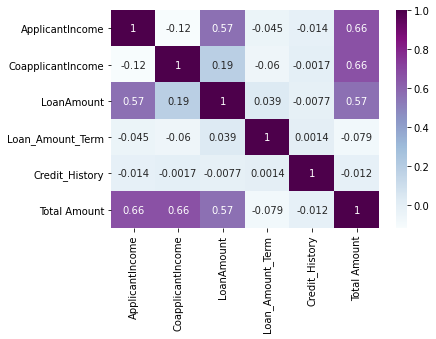

In [24]:
corr = df.corr()

sns.heatmap(corr,annot=True,cmap = "BuPu")

In [25]:
cols = ['Loan_ID']
df = df.drop(columns=cols , axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Amount
0,Male,No,0,Graduate,No,0.072991,-0.554487,0.000000,0.279851,1.0,Urban,Y,-0.481497
1,Male,Yes,1,Graduate,No,-0.134412,-0.038732,-0.219273,0.279851,1.0,Rural,N,-0.173144
2,Male,Yes,0,Graduate,Yes,-0.393747,-0.554487,-0.957641,0.279851,1.0,Urban,Y,-0.948235
3,Male,Yes,0,Not Graduate,No,-0.462062,0.251980,-0.314547,0.279851,1.0,Urban,Y,-0.210083
4,Male,No,0,Graduate,No,0.097728,-0.554487,-0.064454,0.279851,1.0,Urban,Y,-0.456759


In [37]:
cat = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
  df[i] = le.fit_transform(df[i])

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Amount
0,1,0,0,0,0,0.072991,-0.554487,0.000000,0.279851,1.0,2,1,-0.481497
1,1,1,1,0,0,-0.134412,-0.038732,-0.219273,0.279851,1.0,0,0,-0.173144
2,1,1,0,0,1,-0.393747,-0.554487,-0.957641,0.279851,1.0,2,1,-0.948235
3,1,1,0,1,0,-0.462062,0.251980,-0.314547,0.279851,1.0,2,1,-0.210083
4,1,0,0,0,0,0.097728,-0.554487,-0.064454,0.279851,1.0,2,1,-0.456759


In [38]:
x = df.drop(columns='Loan_Status',axis=1)
y = df['Loan_Status']

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.model_selection import cross_val_score
def simplify(model,x,y):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
  model.fit(x_train,y_train)
  print("Accuracy = ",model.score(x_test,y_test)*100)
  score = cross_val_score(model,x,y,cv=5)
  print("Cross Score = ",np.mean(score)*100)

In [62]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
 12  Total Amount       614 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 62.5 KB


In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
simplify(model,x,y)

Accuracy =  78.86178861788618
Cross Score =  80.62108489937359


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [65]:

model_param = { 'DecisionTreeClassifier':DecisionTreeClassifier(),'SVC':SVC(),'kNN':KNeighborsClassifier(),'random forest':RandomForestClassifier(),'Logistic Reg':LogisticRegression()}
for model_name,mp in model_param.items():
  print(model_name)
  simplify(mp,x,y)
  print()

DecisionTreeClassifier
Accuracy =  66.66666666666666
Cross Score =  71.00892976142876

SVC
Accuracy =  78.86178861788618
Cross Score =  79.80541116886579

kNN
Accuracy =  69.91869918699187
Cross Score =  74.59016393442623

random forest
Accuracy =  76.42276422764228
Cross Score =  78.34199653471943

Logistic Reg
Accuracy =  78.86178861788618
Cross Score =  80.62108489937359



In [66]:
model = RandomForestClassifier(n_estimators=190,min_samples_split=25,max_depth=7,max_features=1)
simplify(model,x,y)

Accuracy =  78.04878048780488
Cross Score =  80.62108489937359


In [69]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
cm = confusion_matrix(y_test,pred)
cm

array([[17, 26],
       [ 1, 79]])

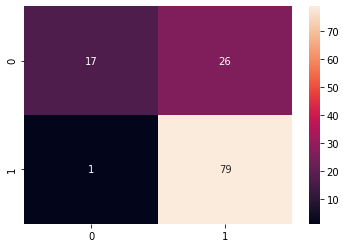

In [70]:
sns.heatmap(cm,annot=True)

In [71]:
from google.colab import files
upload = files.upload()

Saving loan_test.csv to loan_test.csv


In [74]:
df1 = pd.read_csv("loan_test.csv")
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [76]:
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [77]:
df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].mean())
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean())
df1['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].mean())

In [78]:
df1['Gender'] = df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Married'] = df1['Married'].fillna(df1['Married'].mode()[0])
df1['Dependents'] = df1['Dependents'].fillna(df1['Dependents'].mode()[0])
df1['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])

In [80]:
features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
sts = StandardScaler()
df1[features] = sts.fit_transform(df1[features])

In [81]:
df1['Total Amount'] = df1['ApplicantIncome']+df1['CoapplicantIncome']

In [87]:
cat = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
  df1[i] = le.fit_transform(df1[i])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    float64
 6   CoapplicantIncome  367 non-null    float64
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
 11  Total Amount       367 non-null    float64
dtypes: float64(6), object(6)
memory usage: 34.5+ KB


In [88]:
cols = ['Loan_ID']
df2 = df1.drop(columns=cols , axis=1)
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total Amount
0,1,1,0,0,0,0.186461,-0.673335,-0.429368,0.270603,1.000000,2,-0.486875
1,1,1,1,0,0,-0.352692,-0.029848,-0.166482,0.270603,1.000000,2,-0.382540
2,1,1,2,0,0,0.039641,0.098849,1.180807,0.270603,1.000000,2,0.138490
3,1,1,2,0,0,-0.502774,0.418877,-0.593671,0.270603,0.825444,2,-0.083897
4,1,0,0,1,0,-0.311909,-0.673335,-0.955139,0.270603,1.000000,2,-0.985244


In [89]:
pred = model.predict(df2)

In [90]:
submission = pd.DataFrame({
    "Loan_ID":df1['Loan_ID'],
    "Loan_Status":pred
})

In [96]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [100]:
submission.to_csv('/drive/My Drive/loan_answer.csv');